In [1]:
#!pip install geopandas
#!pip install geojson

In [2]:
import pandas as pd
import geopandas as gpd

import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 

from folium import Marker
from geopandas.tools import geocode

In [40]:
quezon = gpd.read_file('/content/drive/MyDrive/quezon.geojson')


In [99]:
quezon

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,NL_NAME_2,VARNAME_2,TYPE_2,ENGTYPE_2,PROVINCE,REGION,NumCases,geometry
0,177,PHL,Philippines,62,Quezon,1296,General Nakar,None,None,Bayan|Munisipyo,Municipality,Quezon,CALABARZON (Region IV-A),NaN,"MULTIPOLYGON (((121.41304 15.21644, 121.41802 ..."
1,177,PHL,Philippines,62,Quezon,1320,San Antonio,None,None,Bayan|Munisipyo,Municipality,Quezon,CALABARZON (Region IV-A),12.0,"MULTIPOLYGON (((121.28394 13.91540, 121.28471 ..."
2,177,PHL,Philippines,62,Quezon,1326,Tiaong,None,None,Bayan|Munisipyo,Municipality,Quezon,CALABARZON (Region IV-A),45.0,"MULTIPOLYGON (((121.36100 13.98739, 121.37118 ..."
3,177,PHL,Philippines,62,Quezon,1292,Candelaria,None,None,Bayan|Munisipyo,Municipality,Quezon,CALABARZON (Region IV-A),113.0,"MULTIPOLYGON (((121.46515 14.06613, 121.47221 ..."
4,177,PHL,Philippines,62,Quezon,1323,Sariaya,None,None,Bayan|Munisipyo,Municipality,Quezon,CALABARZON (Region IV-A),55.0,"MULTIPOLYGON (((121.56377 13.92644, 121.56502 ..."
5,177,PHL,Philippines,62,Quezon,1291,Calauag,None,None,Bayan|Munisipyo,Municipality,Quezon,CALABARZON (Region IV-A),24.0,"MULTIPOLYGON (((122.30797 14.00641, 122.30797 ..."
6,177,PHL,Philippines,62,Quezon,1297,Guinayangan,None,None,Bayan|Munisipyo,Municipality,Quezon,CALABARZON (Region IV-A),3.0,"MULTIPOLYGON (((122.43475 14.05190, 122.43488 ..."
7,177,PHL,Philippines,62,Quezon,1324,Tagkawayan,None,None,Bayan|Munisipyo,Municipality,Quezon,CALABARZON (Region IV-A),13.0,"MULTIPOLYGON (((122.74815 14.03119, 122.76244 ..."
8,177,PHL,Philippines,62,Quezon,1318,Sampaloc,None,None,Bayan|Munisipyo,Municipality,Quezon,CALABARZON (Region IV-A),1.0,"MULTIPOLYGON (((121.63641 14.25676, 121.63603 ..."
9,177,PHL,Philippines,62,Quezon,1306,Mauban,None,None,Bayan|Munisipyo,Municipality,Quezon,CALABARZON (Region IV-A),9.0,"MULTIPOLYGON (((121.73473 14.17194, 121.73424 ..."


In [42]:
#use geocode
def getlatitude_longitude(name):
  result = geocode(name, provider="nominatim")
  point = result.geometry.iloc[0]
  Latitude =  point.y
  Longitude = point.x
  #print(str(Latitude) + " and " + str(Longitude))
  return Latitude , Longitude

In [101]:
#trial
lat,lng = getlatitude_longitude("Hinunangan")

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [76]:
quezon_pd= quezon.copy()

In [96]:
qname = quezon['NAME_2'][1] +","+quezon['PROVINCE'][1]
lat, longi = getlatitude_longitude(qname)
print(lat)
print(longi)

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


13.9532343
122.3707171


In [103]:
qlati = []
qlongi=[]
for idx , row in quezon.iterrows():
  #print(row['NAME_2'][idx])
  #print(idx)
  try: 
    qname = quezon['NAME_2'][idx] +","+quezon['PROVINCE'][idx]
    lat, longi = getlatitude_longitude(qname)
    qlati.append(lat)
    qlongi.append(longi)

  except:
    qname = quezon['NAME_2'][idx]
    lat, longi = getlatitude_longitude(qname)
    qlati.append(lat)
    qlongi.append(longi)


/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [104]:
quezon_pd['Latitude'] = qlati
quezon_pd['Longitude'] = qlongi

In [90]:
quelat , quelong = getlatitude_longitude('Candelaria, Quezon')
print(str(quelat) + " and "+ str(qlongi))

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


13.9334749 and [121.51819601470497, -98.4951405, 121.3228608, -74.86683760095967, 121.5243402, 122.287787, 122.4521906, 122.5392058, 120.993417, 121.7314732, -99.8280905, 121.55486, 121.5918364, -108.4596087, 121.9141841, 121.9208446, 121.8149517, 121.9763634, 122.0147195, 121.9243637, 122.0, 122.1015591, 122.0157499, 121.6854543, 8.7103763, -5.6112011, 122.3223125, 122.4043437, -138.39634858317768, -0.5800364, 122.2175568, 121.9380942, 121.815067, 126.11870210610107, 122.1404468, 121.6495987, 123.3126544, 125.2001942, 122.3306656, 121.6130435, -122.419906, 121.96303738109711]


In [105]:
quezon_pd.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,NL_NAME_2,VARNAME_2,TYPE_2,ENGTYPE_2,PROVINCE,REGION,NumCases,geometry,Latitude,Longitude
0,177,PHL,Philippines,62,Quezon,1296,General Nakar,None,None,Bayan|Munisipyo,Municipality,Quezon,CALABARZON (Region IV-A),0.0,"MULTIPOLYGON (((121.41304 15.21644, 121.41802 ...",14.944823,121.518196
1,177,PHL,Philippines,62,Quezon,1320,San Antonio,None,None,Bayan|Munisipyo,Municipality,Quezon,CALABARZON (Region IV-A),12.0,"MULTIPOLYGON (((121.28394 13.91540, 121.28471 ...",13.953234,122.370717
2,177,PHL,Philippines,62,Quezon,1326,Tiaong,None,None,Bayan|Munisipyo,Municipality,Quezon,CALABARZON (Region IV-A),45.0,"MULTIPOLYGON (((121.36100 13.98739, 121.37118 ...",13.959371,121.322861
3,177,PHL,Philippines,62,Quezon,1292,Candelaria,None,None,Bayan|Munisipyo,Municipality,Quezon,CALABARZON (Region IV-A),113.0,"MULTIPOLYGON (((121.46515 14.06613, 121.47221 ...",13.933475,121.422493
4,177,PHL,Philippines,62,Quezon,1323,Sariaya,None,None,Bayan|Munisipyo,Municipality,Quezon,CALABARZON (Region IV-A),55.0,"MULTIPOLYGON (((121.56377 13.92644, 121.56502 ...",13.962984,121.524340


In [106]:
quezon_pd['NumCases'] = quezon_pd['NumCases'].fillna(0)

In [112]:
hello = 'hello \n hi'
print(hello)

hello 
 hi


In [115]:
import folium
m = folium.Map(location=[quelat, quelong],zoom_start=10)

for idx, row in quezon_pd.iterrows():
  pop = 'Numcases: ' + str(quezon_pd['NumCases'][idx]) +'\n Hospital Available:  '
  Marker([quezon_pd['Latitude'][idx],quezon_pd['Longitude'][idx]],popup=pop).add_to(m)

m

In [141]:
muni = quezon_pd[["geometry","NAME_2"]].set_index("NAME_2")
case= quezon_pd[["NumCases","NAME_2"]].set_index("NAME_2")
case=pd.DataFrame(case)
case.dtypes

NumCases    float64
dtype: object

In [148]:

from folium import Choropleth
m_6 = folium.Map(location=[quelat, quelong], tiles='cartodbpositron', zoom_start=12)

#m_6 = folium.Map(location=[quelat, quelong], tiles='openstreetmap', zoom_start=12)

# Add a choropleth map to the base map
Choropleth(geo_data=muni['geometry'].__geo_interface__, 
           data=case['NumCases'], key_on="feature.id", 
           fill_color='YlGnBu',legend_name='Quezon Number COVID Cases').add_to(m_6)

m_6

In [ ]:

tayabas['NumCases'] = tayabas["ID_1"]*0.5

In [ ]:
tayabas

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,NL_NAME_2,VARNAME_2,TYPE_2,ENGTYPE_2,PROVINCE,REGION,geometry,NumCases
0,177,PHL,Philippines,2,Agusan del Norte,28,Buenavista,None,None,Bayan|Munisipyo,Municipality,Agusan del Norte,Caraga (Region XIII),"MULTIPOLYGON (((125.24110 8.84064, 125.24110 8...",1.0
1,177,PHL,Philippines,2,Agusan del Norte,34,Las Nieves,None,None,Bayan|Munisipyo,Municipality,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.24093 8.69190, 125.24231 8.65959...",1.0
2,177,PHL,Philippines,81,Zamboanga del Sur,1627,Tambulig,None,None,Bayan|Munisipyo,Municipality,Zamboanga del Sur,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((123.55341 8.16149, 123.55341 8...",40.5
3,177,PHL,Philippines,81,Zamboanga del Sur,1629,Tukuran,None,None,Bayan|Munisipyo,Municipality,Zamboanga del Sur,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((123.62176 7.82853, 123.62245 7...",40.5
4,177,PHL,Philippines,21,Camiguin,385,Guinsiliban,None,None,Bayan|Munisipyo,Municipality,Camiguin,Northern Mindanao (Region X),"POLYGON ((124.79195 9.13252, 124.79166 9.13222...",10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,177,PHL,Philippines,80,Zamboanga del Norte,1589,Mutia,None,None,Bayan|Munisipyo,Municipality,Zamboanga del Norte,Zamboanga Peninsula (Region IX),"POLYGON ((123.55518 8.37834, 123.55523 8.38354...",40.0
123,177,PHL,Philippines,80,Zamboanga del Norte,1593,Rizal,None,None,Bayan|Munisipyo,Municipality,Zamboanga del Norte,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((123.55505 8.47948, 123.55505 8...",40.0
124,177,PHL,Philippines,80,Zamboanga del Norte,1595,Sergio Osmena Sr.,None,Sergio Osmeña Sr.,Bayan|Munisipyo,Municipality,Zamboanga del Norte,Zamboanga Peninsula (Region IX),"POLYGON ((123.54990 8.21795, 123.55025 8.22065...",40.0
125,177,PHL,Philippines,81,Zamboanga del Sur,1603,Aurora,None,None,Bayan|Munisipyo,Municipality,Zamboanga del Sur,Zamboanga Peninsula (Region IX),"MULTIPOLYGON (((123.62247 7.84516, 123.62300 7...",40.5


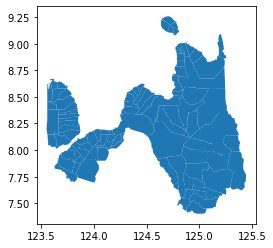

In [ ]:
tayabas.plot()

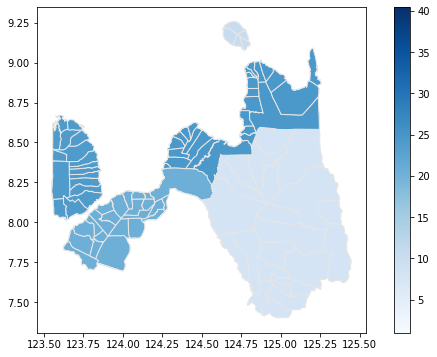

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,6))
tayabas.plot(column='NumCases', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
#ax.axis('off')